In [1]:
#importing libraries, 
#plotting inline method,
#model selection methods,
#and pre processing methods

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#importing cali housing data set from workspace
df = pd.read_csv('.//housing.csv')

In [3]:
#1st 5 rows of the data
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
#checking shape and size of the data set
df.size

206400

In [5]:
df.shape

(20640, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

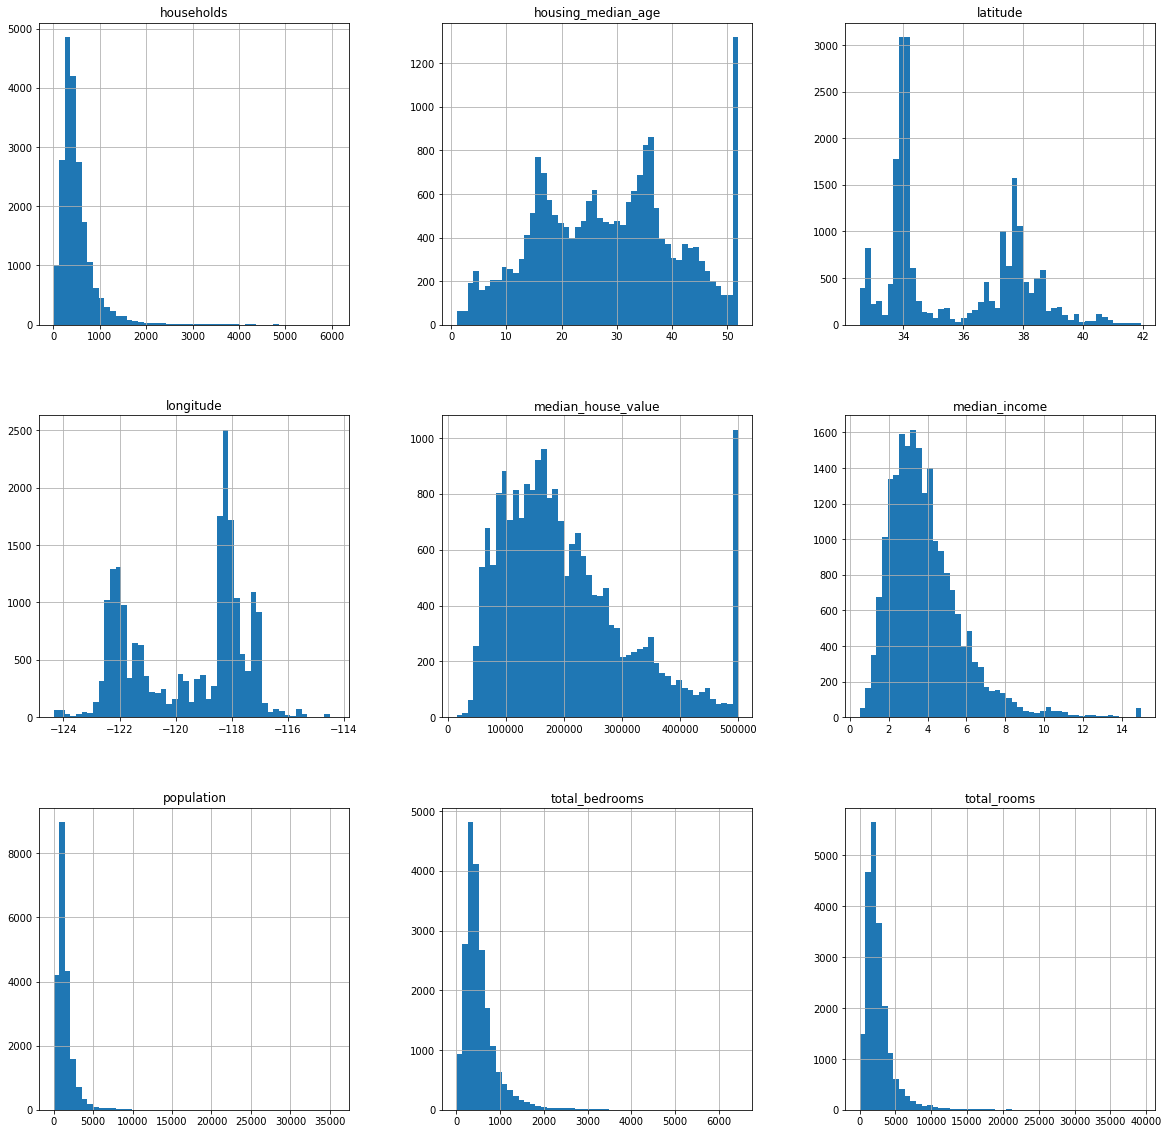

In [9]:
df.hist(bins=50,figsize=(20,20))
plt.show()

In [10]:
#train test split is a widely used method fro splitting the data but has a high probability of sampling bias
#another method that can be used to split the data is stratified split(generates stratified sample)
#in this scenzrio median income is a major factor to predict median housing price....
#so the data division be done in a way that the dataset is repredentative of all income categories
#binning our income col for this purpose
df["income_cat"]=np.ceil(df["median_income"]/1.5)
df["income_cat"].where(df["income_cat"]<5,5.0,inplace=True)

In [11]:
df.head(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   
5       413.0       193.0         4.0368            269700.0        NEAR BAY   
6      1094.0       514.0         3.6591            299200.0        NEAR BAY   
7      1157.0       647.0         3.1200            241400.0        NEAR BAY   
8      1206.0       595.0         2.0804            226700.0        NEAR BAY   
9      1551.0       714.0         3.6912            261100.0        NEAR BAY   

   income_cat  
0         5.0  
1         5.0  
2         5.0  
3         4.0  
4         3.0  
5         3.0  
6         3.0  
7         3.0  
8         2.0  
9         3.0

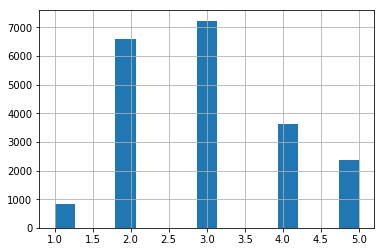

In [12]:
df["income_cat"].hist(bins=15)

In [13]:
#splitting using stratifiedshufflesplit
from sklearn.model_selection import StratifiedShuffleSplit

In [14]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(df,df["income_cat"]):
    train= df.loc[train_index]
    test=df.loc[test_index]

In [15]:
#distribution of income cat in the entire data set
df["income_cat"].value_counts()/len(df)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [16]:
#distribution of income cat in the train data set
train["income_cat"].value_counts()/len(train)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [17]:
#distribution of income cat in the test data set
test["income_cat"].value_counts()/len(test)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [18]:
#dropping the income_cat col
for x in (train,test):
    x.drop("income_cat",axis=1,inplace=True)

In [19]:
#insights generation visualisation of the data set

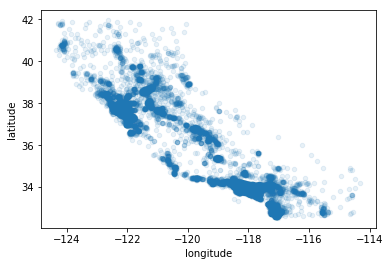

In [20]:
#plotting the geographicallocation using lat and longs
train.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

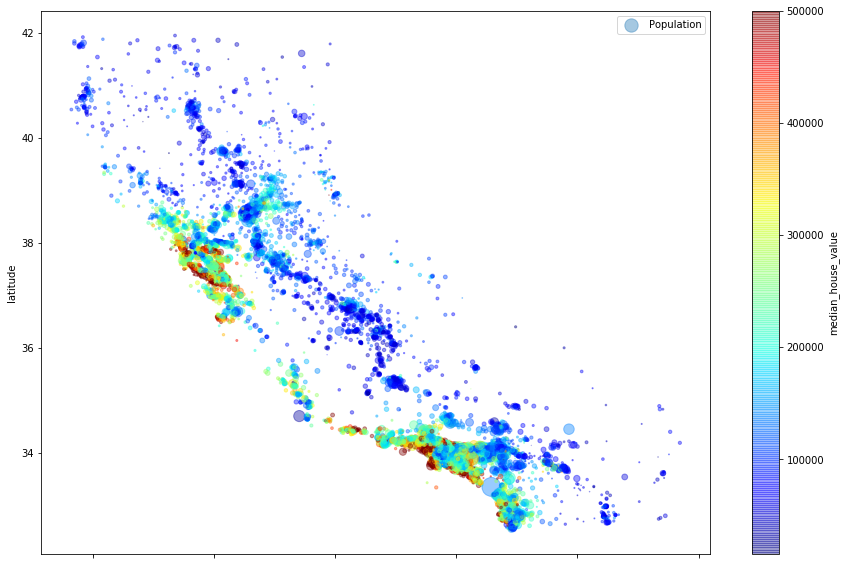

In [21]:
#plotting the prices
train.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
          s=train["population"]/100,label="Population",figsize=(15,10),
          c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()
# s sets the radius of the circle as population of the district,
# c for a colorscheme

In [22]:
#computing pairwise correlation of columns
corr_matrix=df.corr()

In [23]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [24]:
# using correlation matrix
from pandas.tools.plotting import scatter_matrix


C:\Users\rxr318\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023750C0E358>,
      dtype=object)

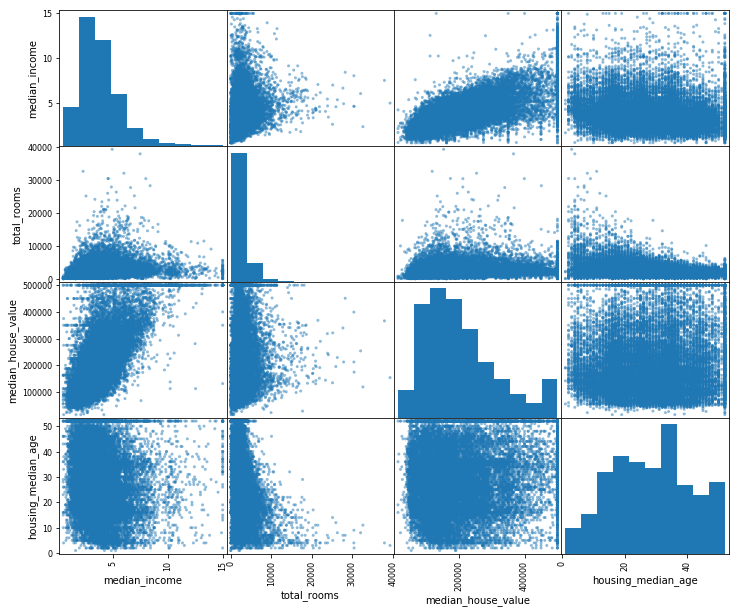

In [25]:
attr=['median_income','total_rooms','median_house_value','housing_median_age']
scatter_matrix(df[attr],figsize=(12,10))

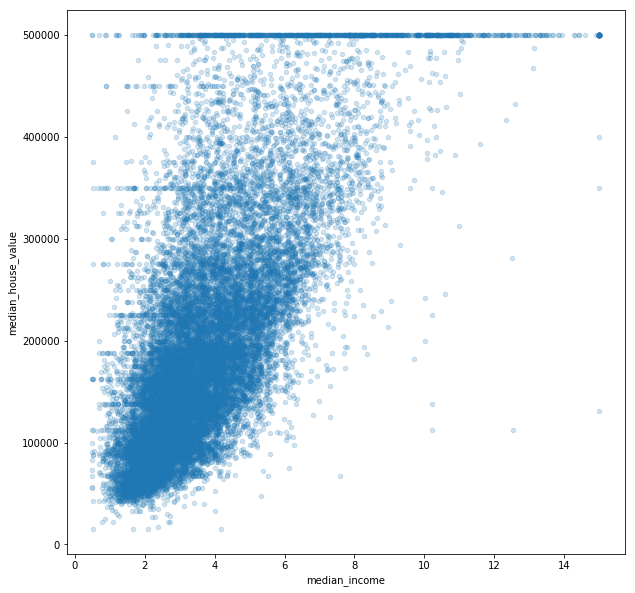

In [26]:
df.plot(kind="scatter", x='median_income',y='median_house_value',alpha=0.2,figsize=(10,10))

In [27]:
#checking various attribute combinations before preparing data for the model
# eg total rooms is not meaningful until we know how many rooms per house... so we find out rooms per household
df['rroms_per_household']=df['total_rooms']/df['households']
df['bedrooms_per_room']=df['total_bedrooms']/df['total_rooms']
df['population_per_household']=df['population']/df['households']

In [28]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   income_cat  rroms_per_household  bedrooms_per_room  \
0         5.0             6.984127           0.146591   
1         5.0             6.238137           0.155797   
2         5.0             8.288136           0.129516   
3         4.0             5.817352           0.184458   
4         3.0             6.281853           0.172096   

   population_per_household  
0                  2.555556  
1                  2.109842  
2                  2.802260  
3                  2.547945  
4                  2.181467

In [29]:
corr_matrix=df.corr()

In [30]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
rroms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [32]:
housing=train.drop(labels='median_house_value',axis=1)

In [33]:
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   
19480    -120.97     37.66                24.0       2930.0           588.0   
8879     -118.50     34.04                52.0       2233.0           317.0   
13685    -117.24     34.15                26.0       2041.0           293.0   
4937     -118.26     33.99                47.0       1865.0           465.0   
4861     -118.28     34.02                29.0        515.0           229.0   
16365    -121.31     38.02                24.0       4157.0           951.0   
19684    -121.62     39.14                41.0       2183.0           559.0   
19234    -122.69     38.51                18.0       3364.0           501.0   
13956    -117.06     34.17                21.0       2520.0           582.0   
2390     -119.46     36.91                12.0       2980.0           495.0   
11176    -117.96     33.83                30.0       2838.0           649.0   
15614    -122.41     37.81                25.0       1178.0           545.0   
2953     -119.02     35.35                42.0       1239.0           251.0   
13209    -117.72     34.05                 8.0       1841.0           409.0   
6569     -118.15     34.20                46.0       1505.0           261.0   
5825     -118.30     34.19                14.0       3615.0           913.0   
18086    -122.05     37.31                25.0       4111.0           538.0   
16718    -120.66     35.49                17.0       4422.0           945.0   
13600    -117.25     34.16                37.0       1709.0           278.0   
13989    -117.19     34.94                31.0       2034.0           444.0   
15168    -117.06     33.02                24.0        830.0           190.0   
6747     -118.07     34.11                41.0       2869.0           563.0   
7398     -118.24     33.96                44.0       1338.0           366.0   
5562     -118.28     33.91                41.0        620.0           133.0   
16121    -122.46     37.79                52.0       2059.0           416.0   
...          ...       ...                 ...          ...             ...   
12380    -116.47     33.77                26.0       4300.0           767.0   
5618     -118.23     33.78                20.0         59.0            24.0   
10060    -121.06     39.25                17.0       3127.0           539.0   
18067    -122.03     37.29                22.0       3118.0           438.0   
4471     -118.17     34.09                33.0       2907.0           797.0   
19786    -122.86     40.56                12.0       1350.0           300.0   
9969     -122.48     38.51                49.0       1977.0           393.0   
14621    -117.17     32.78                17.0       3845.0          1051.0   
579      -122.07     37.71                40.0       1808.0           302.0   
11682    -118.01     33.87                25.0       6348.0          1615.0   
245      -122.21     37.78                43.0       1702.0           460.0   
12130    -117.23     33.94                 8.0       2405.0           537.0   
16441    -121.29     38.14                34.0       2770.0           544.0   
11016    -117.82     33.76                33.0       2774.0           428.0   
19934    -119.34     36.31                14.0       1635.0           422.0   
1364     -122.14     38.03                42.0        118.0            34.0   
1236     -120.37     38.23                13.0       4401.0           829.0   
5364     -118.42     34.04                52.0       1358.0           272.0   
11703    -117.97     33.88                16.0       2003

In [34]:
housing_label=train['median_house_value'].copy()

In [38]:
housing_num=df.drop(labels='ocean_proximity',axis=1)

In [39]:
from sklearn.preprocessing import Imputer

In [41]:
impute=Imputer()

In [42]:
impute.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [43]:
impute.statistics_

array([-1.19569704e+02,  3.56318614e+01,  2.86394864e+01,  2.63576308e+03,
        5.37870553e+02,  1.42547674e+03,  4.99539680e+02,  3.87067100e+00,
        2.06855817e+05,  3.00668605e+00,  5.42899974e+00,  2.13038830e-01,
        3.07065516e+00])

In [45]:
X=impute.transform(housing_num)

In [1]:
housing_num

NameError: name 'housing_num' is not defined